In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 140)

# Пути к файлам (относительно текущей папки проекта)
train_path = "Обучающая выборка.csv"
test1_path = "КС-1.csv"
test2_path = "КС-2.csv"

common_read_kwargs = dict(
    sep=";",       # разделитель в файле
    decimal=",",   # десятичная запятая
    parse_dates=["Дата и время"],
    dayfirst=True
)

train = pd.read_csv(train_path, **common_read_kwargs)
ks1 = pd.read_csv(test1_path, **common_read_kwargs)
ks2 = pd.read_csv(test2_path, **common_read_kwargs)

# Сортируем по времени на всякий случай
train = train.sort_values("Дата и время").reset_index(drop=True)
ks1 = ks1.sort_values("Дата и время").reset_index(drop=True)
ks2 = ks2.sort_values("Дата и время").reset_index(drop=True)

train.head()

,Дата и время,N2,N1,P2,T1,N3,Qtg,V1,VoГГ,3.77F2,Fтк4,3F2,Tк.з.,Lm1,T638,V2,ТРК,dPfgo,dPf2,dPf1,T607,T606,T600,Рс2,Рс1,Fc2,F2,3F1,Fc3,F1,Pm,P615,2F2,Fкпа,Fцс,Fc4,2F1,T4ср
0,01.02.2024 00:00:00,11828,8743,13.57,4.2,4597,4259,3.31,4.98,0.03,0.04,0.15,25.7,939.25,83.1,3.19,74.38,0.772,0.240,0.074,41.1,108.0,60.2,0.14,0.08,0.06,0.05,0.13,0.05,1.35,3.22,1.23,0.05,0.08,0.09,0.08,0.89,690.9
1,01.02.2024 00:01:00,11826,8743,13.59,4.2,4597,4259,3.31,4.75,0.03,0.03,0.17,25.7,939.23,83.1,3.15,74.38,0.772,0.240,0.074,41.1,108.0,60.2,0.14,0.08,0.15,0.05,0.12,0.03,1.37,3.22,1.23,0.06,0.07,0.06,0.08,0.88,691.0
2,01.02.2024 00:02:00,11825,8741,13.55,4.1,4603,4266,3.33,4.94,0.04,0.06,0.09,25.8,939.25,83.1,3.16,74.41,0.597,0.215,0.073,41.1,108.0,60.2,0.14,0.08,0.12,0.06,0.05,0.07,1.45,3.23,1.26,0.04,0.10,0.05,0.08,0.88,691.1
3,01.02.2024 00:03:00,11831,8746,13.56,4.3,4602,4258,3.23,4.93,0.04,0.05,0.13,25.7,939.21,83.1,3.07,74.55,0.656,0.265,0.074,41.1,108.0,60.2,0.14,0.08,0.08,0.04,0.09,0.06,1.42,3.26,1.45,0.07,0.07,0.06,0.09,0.91,691.4
4,01.02.2024 00:04:00,11825,8738,13.64,4.2,4604,4263,3.29,4.92,0.02,0.04,0.20,25.5,939.26,83.1,3.08,74.35,0.537,0.232,0.074,41.1,108.1,60.2,0.14,0.08,0.07,0.05,0.11,0.04,1.38,3.23,1.28,0.06,0.09,0.06,0.10,0.90,690.2


In [2]:
def dataset_overview(df: pd.DataFrame, name: str) -> None:
    print(f"=== {name} ===")
    print("Форма (строки, столбцы):", df.shape)
    print("\nТипы данных:")
    print(df.dtypes)

    print("\nЧисло пропусков (top 10):")
    missing = df.isna().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if not missing.empty:
        print(missing.head(10))
    else:
        print("Пропусков не обнаружено")

    print("\nОписательная статистика (первые 15 признаков):")
    display(df.describe().T.head(15))
    print("\n" + "-" * 80 + "\n")

for df, name in [
    (train, "Обучающая выборка"),
    (ks1, "КС-1 (тестовый датасет 1)"),
    (ks2, "КС-2 (тестовый датасет 2)"),
]:
    dataset_overview(df, name)

=== Обучающая выборка ===
Форма (строки, столбцы): (143164, 38)

Типы данных:
Дата и время        str
N2                int64
N1                int64
P2              float64
T1              float64
N3                int64
Qtg               int64
V1              float64
VoГГ            float64
3.77F2          float64
Fтк4            float64
3F2             float64
Tк.з.           float64
Lm1             float64
T638            float64
V2              float64
ТРК             float64
dPfgo           float64
dPf2            float64
dPf1            float64
T607            float64
T606            float64
T600            float64
Рс2             float64
Рс1             float64
Fc2             float64
F2              float64
3F1             float64
Fc3             float64
F1              float64
Pm              float64
P615            float64
2F2             float64
Fкпа            float64
Fцс             float64
Fc4             float64
2F1             float64
T4ср            float64
dtype: obj

,count,mean,std,min,25%,50%,75%,max
N2,143164.0,11929.783018,179.713186,27.00,11824.00,11962.00,12048.00,12260.00
N1,143164.0,8854.430227,163.368136,0.00,8742.00,8864.00,8975.00,9226.00
P2,143164.0,14.221679,0.798472,0.07,13.70,14.24,14.64,16.85
T1,143164.0,2.952250,11.068536,-26.40,-4.30,2.30,10.20,32.10
N3,143164.0,4729.897789,125.827172,850.00,4616.00,4745.00,4846.00,4995.00
Qtg,143164.0,4427.035239,243.795404,0.00,4255.00,4429.00,4603.00,5092.00
V1,143164.0,3.557286,0.388758,-0.01,3.28,3.55,3.78,8.43
VoГГ,143164.0,6.157365,1.153210,0.23,5.35,5.94,6.67,24.21
3.77F2,143164.0,0.037705,0.015266,0.00,0.03,0.04,0.04,0.45
Fтк4,143164.0,0.041714,0.030392,0.00,0.03,0.04,0.05,0.39



--------------------------------------------------------------------------------

=== КС-1 (тестовый датасет 1) ===
Форма (строки, столбцы): (447, 38)

Типы данных:
Дата и время    datetime64[us]
N2                       int64
N1                       int64
P2                     float64
T1                     float64
N3                       int64
Qtg                      int64
V1                     float64
VoГГ                   float64
3.77F2                 float64
Fтк4                   float64
3F2                    float64
Tк.з.                  float64
Lm1                    float64
T638                   float64
V2                     float64
ТРК                    float64
dPfgo                  float64
dPf2                   float64
dPf1                   float64
T607                   float64
T606                   float64
T600                   float64
Рс2                    float64
Рс1                    float64
Fc2                    float64
F2                     float

,count,mean,min,25%,50%,75%,max,std
Дата и время,447,2021-01-05 10:43:00,2021-01-05 07:00:00,2021-01-05 08:51:30,2021-01-05 10:43:00,2021-01-05 12:34:30,2021-01-05 14:26:00,NaN
N2,447.0,11839.436242,1599.0,11907.0,11928.0,11934.0,11952.0,845.899397
N1,447.0,9224.10962,8537.0,9235.0,9256.0,9260.0,9272.0,125.258313
P2,447.0,15.225168,0.15,15.37,15.39,15.4,15.45,1.28182
T1,447.0,-3.049217,-4.0,-3.5,-3.1,-2.7,-1.6,0.483859
N3,447.0,4907.496644,197.0,4947.0,4952.0,4956.0,4963.0,392.87693
Qtg,447.0,4765.105145,184.0,4815.0,4823.0,4828.0,4842.0,400.354563
V1,447.0,4.737629,0.63,3.81,4.62,5.54,8.05,1.076248
VoГГ,447.0,18.830425,1.75,9.76,16.4,27.795,44.68,9.418143
3.77F2,447.0,0.546063,0.03,0.46,0.54,0.64,0.99,0.141873



--------------------------------------------------------------------------------

=== КС-2 (тестовый датасет 2) ===
Форма (строки, столбцы): (1020, 38)

Типы данных:
Дата и время    datetime64[us]
N2                       int64
N1                       int64
P2                     float64
T1                     float64
N3                       int64
Qtg                      int64
V1                     float64
VoГГ                   float64
3.77F2                 float64
Fтк4                   float64
3F2                    float64
Tк.з.                  float64
Lm1                    float64
T638                   float64
V2                     float64
ТРК                    float64
dPfgo                  float64
dPf2                   float64
dPf1                   float64
T607                   float64
T606                   float64
T600                   float64
Рс2                    float64
Рс1                    float64
Fc2                    float64
F2                     floa

,count,mean,min,25%,50%,75%,max,std
Дата и время,1020,2022-01-16 14:29:30,2022-01-16 06:00:00,2022-01-16 10:14:45,2022-01-16 14:29:30,2022-01-16 18:44:15,2022-01-16 22:59:00,NaN
N2,1020.0,11875.798039,198.0,11916.75,11934.0,11948.0,11978.0,715.592618
N1,1020.0,9042.54902,52.0,9079.0,9092.0,9107.0,9161.0,577.101801
P2,1020.0,14.252157,-0.01,14.32,14.36,14.4,14.54,1.027029
T1,1020.0,-9.167157,-12.8,-9.9,-9.1,-8.7,-3.8,1.161481
N3,1020.0,4576.819608,222.0,4599.0,4600.0,4602.0,4654.0,294.378437
Qtg,1020.0,4305.49902,2714.0,4313.0,4333.0,4351.0,4403.0,214.534915
V1,1020.0,4.131539,0.23,4.0,4.13,4.27,4.87,0.290234
VoГГ,1020.0,6.702108,0.51,6.28,6.5,6.86,10.52,0.847472
3.77F2,1020.0,0.095833,0.02,0.08,0.09,0.11,0.22,0.023796



--------------------------------------------------------------------------------



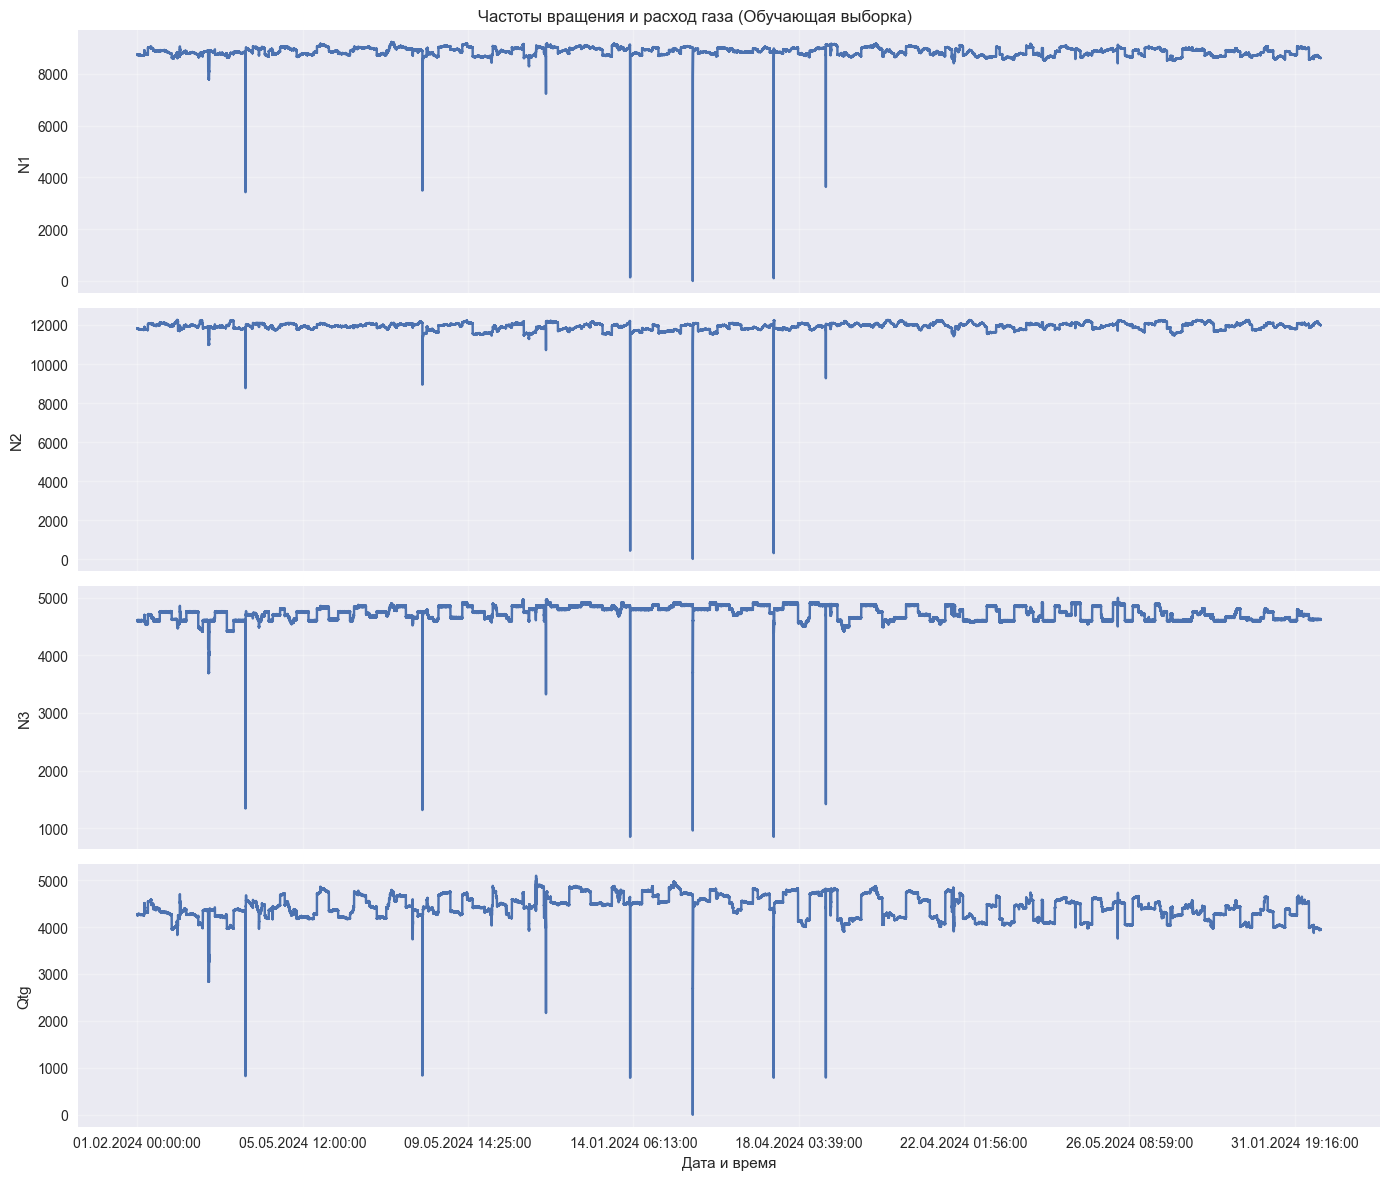

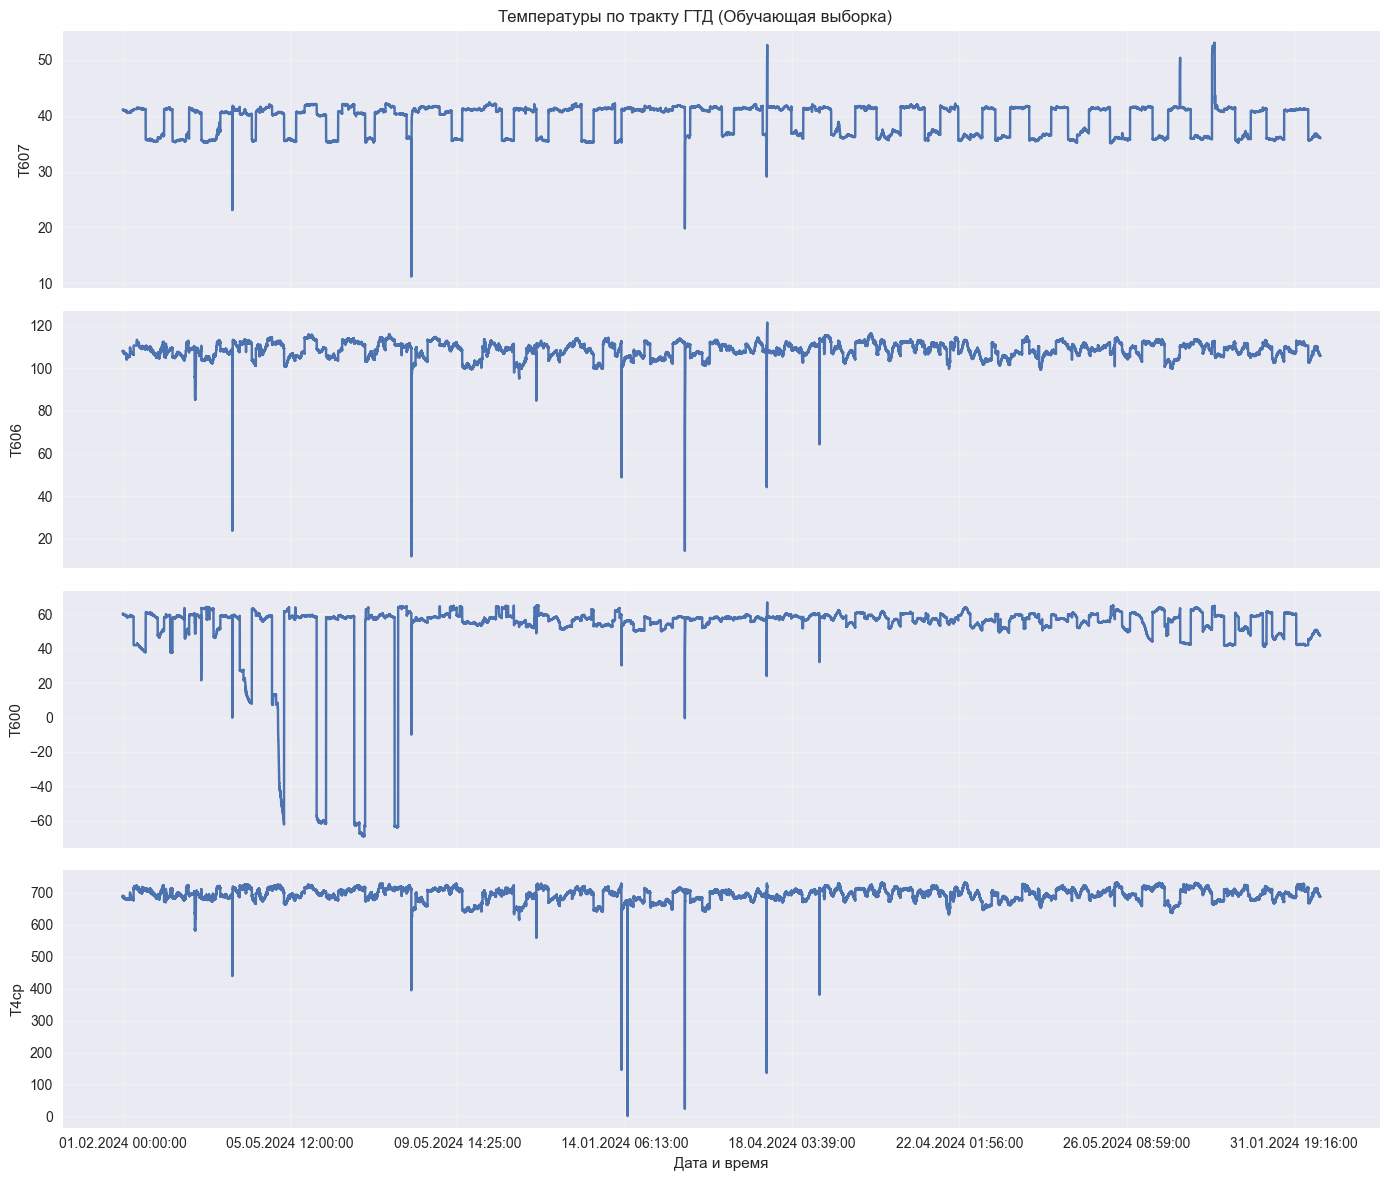

In [3]:
# Временные ряды ключевых параметров (обучающая выборка)

key_cols_speed_flow = ["N1", "N2", "N3", "Qtg"]
key_cols_temp = ["T607", "T606", "T600", "T4ср"]

train_ts = train.set_index("Дата и время")

fig, axes = plt.subplots(len(key_cols_speed_flow), 1, figsize=(14, 3 * len(key_cols_speed_flow)), sharex=True)
for ax, col in zip(axes, key_cols_speed_flow):
    if col in train_ts.columns:
        train_ts[col].plot(ax=ax)
        ax.set_ylabel(col)
        ax.grid(True, alpha=0.3)
ax.set_xlabel("Дата и время")
fig.suptitle("Частоты вращения и расход газа (Обучающая выборка)")
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(len(key_cols_temp), 1, figsize=(14, 3 * len(key_cols_temp)), sharex=True)
for ax, col in zip(axes, key_cols_temp):
    if col in train_ts.columns:
        train_ts[col].plot(ax=ax)
        ax.set_ylabel(col)
        ax.grid(True, alpha=0.3)
ax.set_xlabel("Дата и время")
fig.suptitle("Температуры по тракту ГТД (Обучающая выборка)")
fig.tight_layout()
plt.show()

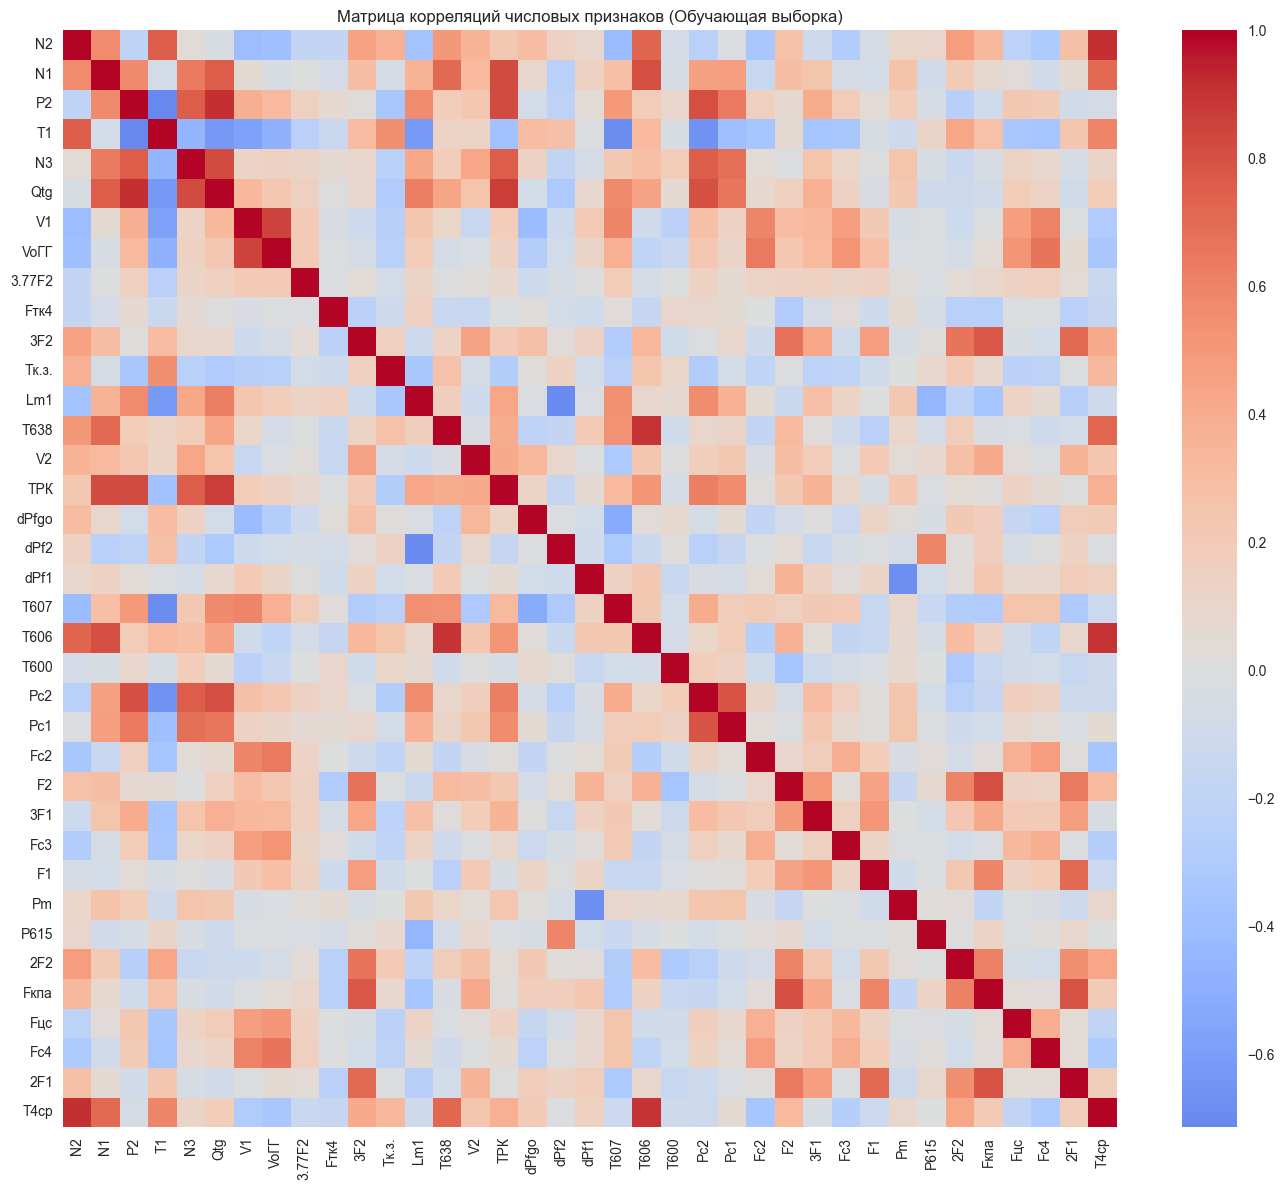

In [4]:
# Матрица корреляций (по числовым признакам обучающей выборки)

numeric_cols = train.select_dtypes(include=[np.number]).columns

corr = train[numeric_cols].corr(method="pearson")
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="coolwarm", center=0, square=False)
plt.title("Матрица корреляций числовых признаков (Обучающая выборка)")
plt.tight_layout()
plt.show()

In [5]:
# Сравнение распределений ключевых признаков между обучающей и тестовыми выборками

key_cols = [
    "N1", "N2", "N3", "Qtg", "T607", "T606", "T600", "T4ср",
    "Lm1", "T638", "Pm", "P615", "T1"
]

summary_list = []
for df, name in [
    (train, "train"),
    (ks1, "KS-1"),
    (ks2, "KS-2"),
]:
    existing = [c for c in key_cols if c in df.columns]
    desc = df[existing].describe().T
    desc["dataset"] = name
    summary_list.append(desc)

summary = pd.concat(summary_list)
summary

,count,mean,std,min,25%,50%,75%,max,dataset
N1,143164.0,8854.430227,163.368136,0.00,8742.00,8864.00,8975.00,9226.00,train
N2,143164.0,11929.783018,179.713186,27.00,11824.00,11962.00,12048.00,12260.00,train
N3,143164.0,4729.897789,125.827172,850.00,4616.00,4745.00,4846.00,4995.00,train
Qtg,143164.0,4427.035239,243.795404,0.00,4255.00,4429.00,4603.00,5092.00,train
T607,143164.0,39.389483,2.621167,11.20,36.30,40.90,41.40,53.10,train
T606,143164.0,108.616299,3.629640,11.70,106.40,109.00,111.40,121.50,train
T600,143164.0,53.053751,19.304505,-68.90,54.10,57.70,59.30,66.90,train
T4ср,143164.0,695.233366,20.110098,1.00,683.40,698.20,710.50,733.80,train
Lm1,143164.0,928.807624,17.748405,876.02,930.33,930.45,939.23,992.97,train
T638,143164.0,82.407445,1.845397,17.10,81.20,82.50,83.80,94.40,train


In [7]:
# Анализ распределения аномальных оценок и простые пороги

import numpy as np

iso_thr = np.quantile(iso_scores_train, 0.995)  # верхние 0.5% как аномалии
svm_thr = np.quantile(svm_scores_train, 0.995)

print("IsolationForest:")
for name, scores in [
    ("train", iso_scores_train),
    ("KS-1", iso_scores_ks1),
    ("KS-2", iso_scores_ks2),
]:
    frac = (scores > iso_thr).mean()
    print(f"  {name}: порог={iso_thr:.3f}, доля аномалий={frac:.4f}")

print("\nOne-Class SVM:")
for name, scores in [
    ("train", svm_scores_train),
    ("KS-1", svm_scores_ks1),
    ("KS-2", svm_scores_ks2),
]:
    frac = (scores > svm_thr).mean()
    print(f"  {name}: порог={svm_thr:.3f}, доля аномалий={frac:.4f}")

# Для наглядности добавим оценки в таблицы
train_feat["iso_score"] = iso_scores_train
train_feat["svm_score"] = svm_scores_train
ks1_feat["iso_score"] = iso_scores_ks1
ks1_feat["svm_score"] = svm_scores_ks1
ks2_feat["iso_score"] = iso_scores_ks2
ks2_feat["svm_score"] = svm_scores_ks2

train_feat.sort_values("iso_score", ascending=False).head(10)

NameError: name 'iso_scores_train' is not defined

In [8]:
# Формирование диагностических и режимных признаков

DIAG_COLUMNS = [
    # вибрация корпусов / общая
    "V1", "VoГГ", "V2",
    # гармоники подшипников и сепараторов
    "Fтк4", "Fc2", "Fc3", "Fc4",
    # гармоники роторов
    "F1", "2F1", "3F1", "F2", "2F2", "3F2", "Fкпа", "Fцс",
    # маслосистема / суфлирование / локальные температуры
    "Pm", "P615", "dPfgo", "dPf1", "dPf2",
    "Рс1", "Рс2",
    "T607", "T606", "T600", "T638", "Tк.з.", "Lm1",
]

REGIME_COLUMNS = [
    "N1", "N2", "N3", "Qtg", "P2", "T1", "T4ср",
]

ALL_FEATURE_COLUMNS = DIAG_COLUMNS + REGIME_COLUMNS


def make_feature_table(df: pd.DataFrame, window: int = 60) -> pd.DataFrame:
    """Строим таблицу признаков для модели аномалий.

    window — окно в минутах для скользящих статистик.
    """
    df = df.sort_values("Дата и время").reset_index(drop=True).copy()
    df = df.set_index("Дата и время")

    cols = [c for c in ALL_FEATURE_COLUMNS if c in df.columns]
    feat = df[cols].astype(float)

    # Скользящее среднее и сигма по ключевым виброканалам
    vib_keys = [
        c for c in [
            "VoГГ", "V1", "V2",
            "F1", "2F1", "3F1", "F2", "2F2", "3F2",
            "Fтк4", "Fc2", "Fc3", "Fc4",
        ]
        if c in feat.columns
    ]

    roll = feat[vib_keys].rolling(window=window, min_periods=window // 3)
    roll_mean = roll.mean().add_suffix("_roll_mean")
    roll_std = roll.std().add_suffix("_roll_std")

    # Отношения гармоник (структура спектра)
    ratio_features = {}
    if "F1" in feat.columns and "2F1" in feat.columns:
        ratio_features["F2F1_over_F1"] = feat["2F1"] / (feat["F1"] + 1e-6)
    if "F1" in feat.columns and "3F1" in feat.columns:
        ratio_features["F3F1_over_F1"] = feat["3F1"] / (feat["F1"] + 1e-6)
    if "F2" in feat.columns and "2F2" in feat.columns:
        ratio_features["F2F2_over_F2"] = feat["2F2"] / (feat["F2"] + 1e-6)
    if "F2" in feat.columns and "3F2" in feat.columns:
        ratio_features["F3F2_over_F2"] = feat["3F2"] / (feat["F2"] + 1e-6)

    ratio_df = pd.DataFrame(ratio_features, index=feat.index)

    # Нормированная вибрация к оборотам (условно на единицу N1/N2)
    norm_features = {}
    if "N1" in feat.columns:
        for c in vib_keys:
            norm_features[f"{c}_per_N1"] = feat[c] / (feat["N1"] + 1e-3)
    if "N2" in feat.columns:
        for c in vib_keys:
            norm_features[f"{c}_per_N2"] = feat[c] / (feat["N2"] + 1e-3)
    norm_df = pd.DataFrame(norm_features, index=feat.index)

    # Склеиваем всё вместе
    full = pd.concat([feat, roll_mean, roll_std, ratio_df, norm_df], axis=1)

    # Удаляем строки с NaN после роллингов (начало ряда)
    full = full.dropna().reset_index()

    return full


train_feat = make_feature_table(train, window=60)
ks1_feat = make_feature_table(ks1, window=60)
ks2_feat = make_feature_table(ks2, window=60)

train_feat.head()

,Дата и время,V1,VoГГ,V2,Fтк4,Fc2,Fc3,Fc4,F1,2F1,3F1,F2,2F2,3F2,Fкпа,Fцс,Pm,P615,dPfgo,dPf1,dPf2,Рс1,Рс2,T607,T606,T600,T638,Tк.з.,Lm1,N1,N2,N3,Qtg,P2,T1,T4ср,VoГГ_roll_mean,V1_roll_mean,V2_roll_mean,F1_roll_mean,2F1_roll_mean,3F1_roll_mean,F2_roll_mean,2F2_roll_mean,3F2_roll_mean,Fтк4_roll_mean,Fc2_roll_mean,Fc3_roll_mean,Fc4_roll_mean,VoГГ_roll_std,V1_roll_std,V2_roll_std,F1_roll_std,2F1_roll_std,3F1_roll_std,F2_roll_std,2F2_roll_std,3F2_roll_std,Fтк4_roll_std,Fc2_roll_std,Fc3_roll_std,Fc4_roll_std,F2F1_over_F1,F3F1_over_F1,F2F2_over_F2,F3F2_over_F2,VoГГ_per_N1,V1_per_N1,V2_per_N1,F1_per_N1,2F1_per_N1,3F1_per_N1,F2_per_N1,2F2_per_N1,3F2_per_N1,Fтк4_per_N1,Fc2_per_N1,Fc3_per_N1,Fc4_per_N1,VoГГ_per_N2,V1_per_N2,V2_per_N2,F1_per_N2,2F1_per_N2,3F1_per_N2,F2_per_N2,2F2_per_N2,3F2_per_N2,Fтк4_per_N2,Fc2_per_N2,Fc3_per_N2,Fc4_per_N2
0,01.02.2024 00:19:00,3.29,5.33,3.51,0.04,0.15,0.08,0.11,1.34,0.86,0.25,0.09,0.05,0.29,0.10,0.07,3.23,1.39,0.593,0.073,0.246,0.08,0.15,41.1,107.8,60.1,82.9,25.0,939.25,8724.0,11798.0,4608.0,4256.0,13.63,2.5,686.5,4.968500,3.253500,3.173000,1.347500,0.873500,0.138000,0.064500,0.055000,0.160000,0.044000,0.129500,0.065500,0.092000,0.154929,0.047492,0.128682,0.063235,0.028887,0.060402,0.017614,0.009459,0.048774,0.010463,0.045477,0.019050,0.016733,0.641791,0.186567,0.555549,3.222186,0.000611,0.000377,0.000402,0.000154,0.000099,0.000029,0.000010,0.000006,0.000033,0.000005,0.000017,0.000009,0.000013,0.000452,0.000279,0.000298,0.000114,0.000073,0.000021,0.000008,0.000004,0.000025,0.000003,0.000013,0.000007,0.000009
1,01.02.2024 00:20:00,3.33,5.21,3.50,0.03,0.15,0.06,0.09,1.24,0.90,0.29,0.07,0.09,0.19,0.07,0.06,3.22,1.27,0.470,0.074,0.209,0.08,0.15,41.1,107.7,60.0,82.9,24.9,939.27,8725.0,11794.0,4594.0,4258.0,13.61,2.4,686.6,4.980000,3.257143,3.188571,1.342381,0.874762,0.145238,0.064762,0.056667,0.161429,0.043333,0.130476,0.065238,0.091905,0.159937,0.049208,0.144301,0.065947,0.028744,0.067574,0.017210,0.011972,0.047988,0.010646,0.044551,0.018606,0.016315,0.725806,0.233871,1.285696,2.714247,0.000597,0.000382,0.000401,0.000142,0.000103,0.000033,0.000008,0.000010,0.000022,0.000003,0.000017,0.000007,0.000010,0.000442,0.000282,0.000297,0.000105,0.000076,0.000025,0.000006,0.000008,0.000016,0.000003,0.000013,0.000005,0.000008
2,01.02.2024 00:21:00,3.43,5.75,3.50,0.03,0.19,0.05,0.09,1.38,0.87,0.27,0.09,0.05,0.18,0.10,0.06,3.18,1.27,0.658,0.075,0.238,0.08,0.14,41.1,107.6,59.9,82.9,24.9,939.21,8722.0,11797.0,4609.0,4259.0,13.62,2.3,685.9,5.015000,3.265000,3.202727,1.344091,0.874545,0.150909,0.065909,0.056364,0.162273,0.042727,0.133182,0.064545,0.091818,0.226521,0.060533,0.155691,0.064856,0.028069,0.071108,0.017636,0.011770,0.046999,0.010771,0.045291,0.018446,0.015927,0.630434,0.195652,0.555549,1.999978,0.000659,0.000393,0.000401,0.000158,0.000100,0.000031,0.000010,0.000006,0.000021,0.000003,0.000022,0.000006,0.000010,0.000487,0.000291,0.000297,0.000117,0.000074,0.000023,0.000008,0.000004,0.000015,0.000003,0.000016,0.000004,0.000008
3,01.02.2024 00:22:00,3.47,5.83,3.60,0.05,0.17,0.07,0.11,1.39,0.91,0.28,0.07,0.04,0.26,0.07,0.07,3.22,1.20,0.737,0.073,0.238,0.08,0.14,41.1,107.5,59.9,82.8,24.9,939.26,8721.0,11794.0,4592.0,4245.0,13.61,2.2,684.5,5.050435,3.273913,3.220000,1.346087,0.876087,0.156522,0.066087,0.055652,0.166522,0.043043,0.134783,0.064783,0.092609,0.279032,0.072972,0.173205,0.064084,0.028403,0.074505,0.017252,0.011995,0.050237,0.010632,0.044911,0.018058,0.016016,0.654676,0.201439,0.571420,3.714233,0.000669,0.000398,0.000413,0.000159,0.000104,0.000032,0.000008,0.000005,0.000030,0.000006,0.000019,0.000008,0.000013,0.000494,0.000294,0.000305,0.000118,0.000077,0.000024,0.000006,0.000003,0.000022,0.000004,0.000014,0.000006,0.000009
4,01.02.2024 00:23:00,3.46,5.36,3.50,0.05,0.22,0.09,0.12,1.32,0.89,0.27,0.05,0.04,0.25,0.09,0.07,3.25,1.38,0.649,0.075,0.283,0.08,0.14,41.1,107.6,59.9,82.8,24.7,939.25,8720.0,11796.0,4604.0,4256.0,13.54,2.5,684.8,5.063333,3.281667,3.231667,1.345000,0.876667,0.161250,0.065417,0.055000,0.17000

In [9]:
# One-class модели для детектирования аномалий

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Признаки для моделирования: всё числовое, кроме времени
feature_cols = [c for c in train_feat.columns if c != "Дата и время"]

X_train = train_feat[feature_cols].values
X_ks1 = ks1_feat[feature_cols].reindex(columns=feature_cols, fill_value=0.0).values
X_ks2 = ks2_feat[feature_cols].reindex(columns=feature_cols, fill_value=0.0).values

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_ks1_scaled = scaler.transform(X_ks1)
X_ks2_scaled = scaler.transform(X_ks2)

# Isolation Forest
iso = IsolationForest(
    n_estimators=200,
    contamination=0.01,  # ожидаем, что аномалий немного
    random_state=42,
    n_jobs=-1,
)
iso.fit(X_train_scaled)

iso_scores_train = -iso.decision_function(X_train_scaled)
iso_scores_ks1 = -iso.decision_function(X_ks1_scaled)
iso_scores_ks2 = -iso.decision_function(X_ks2_scaled)

# One-Class SVM (может работать дольше, поэтому параметры консервативные)
ocsvm = OneClassSVM(
    kernel="rbf",
    gamma="scale",
    nu=0.01,
)
ocsvm.fit(X_train_scaled)

svm_scores_train = -ocsvm.decision_function(X_train_scaled)
svm_scores_ks1 = -ocsvm.decision_function(X_ks1_scaled)
svm_scores_ks2 = -ocsvm.decision_function(X_ks2_scaled)

print("Готово: модели обучены, оценки аномальности посчитаны.")

Готово: модели обучены, оценки аномальности посчитаны.


In [10]:
# Анализ распределения аномальных оценок и простые пороги

import numpy as np

iso_thr = np.quantile(iso_scores_train, 0.995)  # верхние 0.5% как аномалии
svm_thr = np.quantile(svm_scores_train, 0.995)

print("IsolationForest:")
for name, scores in [
    ("train", iso_scores_train),
    ("KS-1", iso_scores_ks1),
    ("KS-2", iso_scores_ks2),
]:
    frac = (scores > iso_thr).mean()
    print(f"  {name}: порог={iso_thr:.3f}, доля аномалий={frac:.4f}")

print("\nOne-Class SVM:")
for name, scores in [
    ("train", svm_scores_train),
    ("KS-1", svm_scores_ks1),
    ("KS-2", svm_scores_ks2),
]:
    frac = (scores > svm_thr).mean()
    print(f"  {name}: порог={svm_thr:.3f}, доля аномалий={frac:.4f}")

# Для наглядности добавим оценки в таблицы
train_feat["iso_score"] = iso_scores_train
train_feat["svm_score"] = svm_scores_train
ks1_feat["iso_score"] = iso_scores_ks1
ks1_feat["svm_score"] = svm_scores_ks1
ks2_feat["iso_score"] = iso_scores_ks2
ks2_feat["svm_score"] = svm_scores_ks2

train_feat.sort_values("iso_score", ascending=False).head(10)

IsolationForest:
  train: порог=0.032, доля аномалий=0.0050
  KS-1: порог=0.032, доля аномалий=0.7991
  KS-2: порог=0.032, доля аномалий=0.1069

One-Class SVM:
  train: порог=1.387, доля аномалий=0.0050
  KS-1: порог=1.387, доля аномалий=1.0000
  KS-2: порог=1.387, доля аномалий=1.0000


,Дата и время,V1,VoГГ,V2,Fтк4,Fc2,Fc3,Fc4,F1,2F1,3F1,F2,2F2,3F2,Fкпа,Fцс,Pm,P615,dPfgo,dPf1,dPf2,Рс1,Рс2,T607,T606,T600,T638,Tк.з.,Lm1,N1,N2,N3,Qtg,P2,T1,T4ср,VoГГ_roll_mean,V1_roll_mean,V2_roll_mean,F1_roll_mean,2F1_roll_mean,3F1_roll_mean,F2_roll_mean,2F2_roll_mean,3F2_roll_mean,Fтк4_roll_mean,Fc2_roll_mean,Fc3_roll_mean,Fc4_roll_mean,VoГГ_roll_std,V1_roll_std,V2_roll_std,F1_roll_std,2F1_roll_std,3F1_roll_std,F2_roll_std,2F2_roll_std,3F2_roll_std,Fтк4_roll_std,Fc2_roll_std,Fc3_roll_std,Fc4_roll_std,F2F1_over_F1,F3F1_over_F1,F2F2_over_F2,F3F2_over_F2,VoГГ_per_N1,V1_per_N1,V2_per_N1,F1_per_N1,2F1_per_N1,3F1_per_N1,F2_per_N1,2F2_per_N1,3F2_per_N1,Fтк4_per_N1,Fc2_per_N1,Fc3_per_N1,Fc4_per_N1,VoГГ_per_N2,V1_per_N2,V2_per_N2,F1_per_N2,2F1_per_N2,3F1_per_N2,F2_per_N2,2F2_per_N2,3F2_per_N2,Fтк4_per_N2,Fc2_per_N2,Fc3_per_N2,Fc4_per_N2,iso_score,svm_score
59607,13.05.2024 12:59:00,0.12,1.66,0.03,0.10,0.11,0.16,0.03,1.14,0.21,0.07,0.07,0.33,0.16,1.14,0.07,0.10,0.28,-0.162,0.004,0.074,0.00,0.03,35.2,48.8,30.3,47.6,19.2,903.17,140.0,446.0,850.0,789.0,0.07,13.8,145.4,4.814333,2.850167,3.930500,0.954500,0.829500,0.208333,1.162000,0.552333,1.110167,0.037500,0.133000,0.067500,0.091500,0.967249,0.601578,1.622789,0.179429,0.241102,0.102844,0.289627,0.199494,0.481845,0.017430,0.044771,0.027471,0.034583,0.184210,0.061403,4.714218,2.285682,0.011857,0.000857,0.000214,0.008143,0.001500,0.000500,0.000500,0.002357,0.001143,0.000714,0.000786,0.001143,0.000214,0.003722,0.000269,0.000067,0.002556,0.000471,0.000157,0.000157,0.000740,0.000359,0.000224,0.000247,0.000359,0.000067,0.164591,22.869491
69262,16.02.2024 00:10:00,7.37,18.17,4.94,0.06,0.74,0.28,0.77,4.72,1.16,0.42,1.62,0.13,0.65,1.41,0.29,3.23,1.35,0.717,0.103,0.282,0.10,0.18,41.0,102.0,52.0,78.9,13.8,939.23,8767.0,11565.0,4889.0,4791.0,16.43,-24.3,648.0,7.525000,4.214000,4.116167,0.913500,0.255833,0.126667,0.362667,0.072333,0.236500,0.046167,0.290667,0.102333,0.180833,4.736910,1.679440,0.372436,1.759507,0.419234,0.104341,0.613912,0.036423,0.169284,0.013031,0.314712,0.073907,0.162901,0.245763,0.088983,0.080247,0.401234,0.002073,0.000841,0.000563,0.000538,0.000132,0.000048,0.000185,0.000015,0.000074,0.000007,0.000084,0.000032,0.000088,0.001571,0.000637,0.000427,0.000408,0.000100,0.000036,0.000140,0.000011,0.000056,0.000005,0.000064,0.000024,0.000067,0.155611,21.409811
69264,16.02.2024 00:12:00,6.48,14.36,4.95,0.08,0.87,0.23,0.49,3.99,1.11,0.34,1.70,0.19,0.49,1.37,0.11,3.24,1.46,1.127,0.104,0.283,0.10,0.18,41.0,102.0,52.2,78.9,16.7,939.18,8767.0,11566.0,4904.0,4795.0,16.48,-24.2,646.9,7.837500,4.325500,4.151167,1.045667,0.291167,0.134667,0.418333,0.076833,0.246167,0.047500,0.309833,0.110167,0.191167,4.917569,1.740258,0.398778,1.842627,0.445939,0.109335,0.660126,0.043120,0.175770,0.015252,0.323710,0.082677,0.168373,0.278195,0.085213,0.111765,0.288235,0.001638,0.000739,0.000565,0.000455,0.000127,0.000039,0.000194,0.000022,0.000056,0.000009,0.000099,0.000026,0.000056,0.001242,0.000560,0.000428,0.000345,0.000096,0.000029,0.000147,0.000016,0.000042,0.000007,0.000075,0.000020,0.000042,0.152124,18.923976
69260,16.02.2024 00:08:00,7.70,19.24,4.85,0.06,1.02,0.31,0.61,4.77,1.10,0.33,1.68,0.11,0.61,1.29,0.52,3.29,1.24,0.817,0.102,0.262,0.10,0.18,41.0,102.0,52.1,78.9,13.8,939.24,8769.0,11568.0,4904.0,4791.0,16.50,-24.3,648.2,7.091500,4.086000,4.083500,0.772833,0.220333,0.117000,0.309167,0.070167,0.221167,0.045000,0.272333,0.096167,0.165000,4.274229,1.580372,0.344506,1.643375,0.387464,0.093234,0.563774,0.035391,0.153171,0.012282,0.306651,0.068175,0.140200,0.230608,0.069182,0.065476,0.363095,0.002194,0.000878,0.000553,0.000544,0.000125,0.000038,0.000192,0.000013,0.000070,0.000007,0.000116,0.000035,0.000070,0.001663,0.000666,0.000419,0.000412,0.000095,0.000029,0.000145,0.000010,0.000053,0.000005,0.000088,0.000027,0.000053,0.151720,21.962313
69259,16.02.2024 00:07:00,7.95,17.29,4.96,0.07,0.94,0.26,0.50,4.72,1.18,0.34,1.84,0.11,0.59,1.31,0.16,3.19,1.46,0.861,0.102,0.274,0.10,0.17,41.0,101.9,51.9,78.9,13.6,939.25,876

In [11]:
# Сравнение качества: raw vs engineered (единый критерий порога)

required = [
    # engineered scores
    "iso_scores_train", "iso_scores_ks1", "iso_scores_ks2",
    "svm_scores_train", "svm_scores_ks1", "svm_scores_ks2",
    # raw scores
    "iso_scores_train_raw", "iso_scores_ks1_raw", "iso_scores_ks2_raw",
    "svm_scores_train_raw", "svm_scores_ks1_raw", "svm_scores_ks2_raw",
]
missing = [k for k in required if k not in globals()]
if missing:
    raise NameError(
        "Не найдены оценки для сравнения: "
        + str(missing)
        + "\nВыполните ячейки: engineered-модели, затем baseline(raw)-модели."
    )

import pandas as pd
import numpy as np

# Порог задаём по train одинаково: верхние 0.5% (99.5 перцентиль)

def build_cmp(model_name: str, features_name: str, s_train, s_ks1, s_ks2):
    thr = float(np.quantile(s_train, 0.995))
    return {
        "model": model_name,
        "features": features_name,
        "thr(train@0.995)": thr,
        "anom_frac_train": float((s_train > thr).mean()),
        "anom_frac_KS1": float((s_ks1 > thr).mean()),
        "anom_frac_KS2": float((s_ks2 > thr).mean()),
        "KS1/train": float((s_ks1 > thr).mean() / ((s_train > thr).mean() + 1e-6)),
        "KS2/train": float((s_ks2 > thr).mean() / ((s_train > thr).mean() + 1e-6)),
    }

rows = [
    build_cmp("IsolationForest", "engineered", iso_scores_train, iso_scores_ks1, iso_scores_ks2),
    build_cmp("IsolationForest", "raw", iso_scores_train_raw, iso_scores_ks1_raw, iso_scores_ks2_raw),
    build_cmp("OneClassSVM", "engineered", svm_scores_train, svm_scores_ks1, svm_scores_ks2),
    build_cmp("OneClassSVM", "raw", svm_scores_train_raw, svm_scores_ks1_raw, svm_scores_ks2_raw),
]

cmp = pd.DataFrame(rows).sort_values(["model", "features"])
cmp

NameError: Не найдены оценки для сравнения: ['iso_scores_train_raw', 'iso_scores_ks1_raw', 'iso_scores_ks2_raw', 'svm_scores_train_raw', 'svm_scores_ks1_raw', 'svm_scores_ks2_raw']
Выполните ячейки: engineered-модели, затем baseline(raw)-модели.